# PCAとクラスタリング

In [306]:
import pandas as pd
import numpy as np

In [307]:
df_0 = pd.read_csv('SSDSE-A-2022.csv', encoding='shift-jis', index_col='SSDSE-A-2022')
df_0.columns = df_0.loc['地域コード'].values.tolist() # リストに変換してカラム名に指定
df_0 = df_0.drop(['area/year', '地域コード'], axis=0)
df_0.head()

,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）,総人口（2015）
SSDSE-A-2022,,,,,,,,,,,,,,,,,,,,,
R01100,北海道,札幌市,1973395,918682,1054713,1933094,897727,1035367,215366,110196,...,8502,355,178,1378,1222,6763,2094,5485,325,1952356
R01202,北海道,函館市,251084,113965,137119,248208,112718,135490,23560,11984,...,1749,41,26,212,128,787,187,700,53,265979
R01203,北海道,小樽市,111299,50136,61163,109971,49441,60530,9169,4678,...,778,17,12,82,78,330,98,348,22,121924
R01204,北海道,旭川市,329306,152108,177198,325287,150318,174969,34691,17797,...,1743,65,36,230,170,1364,254,879,71,339605
R01205,北海道,室蘭市,82383,40390,41993,81658,39960,41698,7769,3916,...,621,11,6,53,41,252,59,195,11,88564


In [308]:
prefecture = df_0.loc[:, '都道府県'].values.tolist()
municipality = df_0.loc[:, '市区町村'].values.tolist()
list = []
for i in range(1741):
    list.append(municipality[i] + '（' + prefecture[i] + '）')
df_0.index = list
df_0.index.name = 'city'

In [309]:
df_0 = df_0.drop(['都道府県', '市区町村'], axis=1)
df_0 = df_0.astype(np.float64) # objectからfloatへ型変換
df_0.head()

,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,15歳未満人口（女）,15〜64歳人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）,総人口（2015）
city,,,,,,,,,,,,,,,,,,,,,
札幌市（北海道）,1973395.0000,918682.0000,1054713.0000,1933094.0000,897727.0000,1035367.0000,215366.0000,110196.0000,105170.0000,1185724.0000,...,8502.0000,355.0000,178.0000,1378.0000,1222.0000,6763.0000,2094.0000,5485.0000,325.0000,1952356.0000
函館市（北海道）,251084.0000,113965.0000,137119.0000,248208.0000,112718.0000,135490.0000,23560.0000,11984.0000,11576.0000,134953.0000,...,1749.0000,41.0000,26.0000,212.0000,128.0000,787.0000,187.0000,700.0000,53.0000,265979.0000
小樽市（北海道）,111299.0000,50136.0000,61163.0000,109971.0000,49441.0000,60530.0000,9169.0000,4678.0000,4491.0000,55643.0000,...,778.0000,17.0000,12.0000,82.0000,78.0000,330.0000,98.0000,348.0000,22.0000,121924.0000
旭川市（北海道）,329306.0000,152108.0000,177198.0000,325287.0000,150318.0000,174969.0000,34691.0000,17797.0000,16894.0000,178060.0000,...,1743.0000,65.0000,36.0000,230.0000,170.0000,1364.0000,254.0000,879.0000,71.0000,339605.0000
室蘭市（北海道）,82383.0000,40390.0000,41993.0000,81658.0000,39960.0000,41698.0000,7769.0000,3916.0000,3853.0000,43398.0000,...,621.0000,11.0000,6.0000,53.0000,41.0000,252.0000,59.0000,195.0000,11.0000,88564.0000


In [310]:
small = (df_0['総人口'] > 0) & (df_0['総人口'] < 100000) # 2020年時点で人口0人の双葉町は削除
print(small.sum())
print((small.sum() / 1741) * 100)

1457
83.68753589890868


In [311]:
medium = (df_0['総人口'] >= 100000) & (df_0['総人口'] < 300000)
print(medium.sum())
print((medium.sum() / 1741) * 100)

197
11.315336013785181


In [312]:
large = df_0['総人口'] >= 300000
print(large.sum())
print((large.sum() / 1741) * 100)

86
4.939689833429064


In [313]:
df = df_0[small]
df = df.drop('千代田区（東京都）') # 東京23区で入っている千代田区の削除
df = df.loc[:, ['総人口', '小学校数', '小学校児童数', '中学校数',  '中学校生徒数', 
                '一般病院数', '一般診療所数', '歯科診療所数', '医師数', '歯科医師数', '薬剤師数']]
df

,総人口,小学校数,小学校児童数,中学校数,中学校生徒数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数
city,,,,,,,,,,,
室蘭市（北海道）,82383.0000,10.0000,3312.0000,8.0000,1700.0000,6.0000,53.0000,41.0000,252.0000,59.0000,195.0000
夕張市（北海道）,7334.0000,1.0000,187.0000,1.0000,100.0000,0.0000,6.0000,5.0000,7.0000,8.0000,16.0000
岩見沢市（北海道）,79306.0000,14.0000,3483.0000,9.0000,1862.0000,5.0000,59.0000,49.0000,182.0000,63.0000,141.0000
網走市（北海道）,35759.0000,9.0000,1631.0000,6.0000,821.0000,4.0000,13.0000,16.0000,61.0000,22.0000,55.0000
留萌市（北海道）,20114.0000,5.0000,788.0000,2.0000,450.0000,2.0000,16.0000,13.0000,44.0000,14.0000,51.0000
...,...,...,...,...,...,...,...,...,...,...,...
久米島町（沖縄県）,7192.0000,6.0000,461.0000,2.0000,216.0000,1.0000,3.0000,2.0000,6.0000,2.0000,9.0000
八重瀬町（沖縄県）,30941.0000,4.0000,2518.0000,2.0000,971.0000,1.0000,12.0000,7.0000,74.0000,17.0000,37.0000
多良間村（沖縄県）,1058.0000,1.0000,84.0000,1.0000,29.0000,0.0000,1.0000,1.0000,1.0000,2.0000,0.0000


In [314]:
df.loc[:, '小学校1校当たり児童数'] = df.loc[:, '小学校児童数'] / df.loc[:, '小学校数']
df.loc[:, '中学校1校当たりの生徒数'] = df.loc[:, '中学校生徒数'] / df.loc[:, '中学校数']
df.loc[:, '人口10万人当たり一般病院数'] = df.loc[:, '一般病院数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり一般診療所数'] = df.loc[:, '一般診療所数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり歯科診療所数'] = df.loc[:, '歯科診療所数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり医師数'] = df.loc[:, '医師数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり歯科医師数'] = df.loc[:, '歯科医師数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり薬剤師数'] = df.loc[:, '薬剤師数'] / df.loc[:, '総人口'] * 100000
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], axis=1)
df.head()

,小学校1校当たり児童数,中学校1校当たりの生徒数,人口10万人当たり一般病院数,人口10万人当たり一般診療所数,人口10万人当たり歯科診療所数,人口10万人当たり医師数,人口10万人当たり歯科医師数,人口10万人当たり薬剤師数
city,,,,,,,,
室蘭市（北海道）,331.2000,212.5000,7.2831,64.3337,49.7675,305.8884,71.6167,236.6993
夕張市（北海道）,187.0000,100.0000,0.0000,81.8107,68.1756,95.4459,109.0810,218.1620
岩見沢市（北海道）,248.7857,206.8889,6.3047,74.3954,61.7860,229.4908,79.4391,177.7923
網走市（北海道）,181.2222,136.8333,11.1860,36.3545,44.7440,170.5864,61.5230,153.8074
留萌市（北海道）,157.6000,225.0000,9.9433,79.5466,64.6316,218.7531,69.6033,253.5547


In [315]:
df = df.replace(np.inf, np.nan) # 小中学校が無いとInfになるので，nanに置き換え
df = df.fillna(0) # nanを0で埋める
df.head()

,小学校1校当たり児童数,中学校1校当たりの生徒数,人口10万人当たり一般病院数,人口10万人当たり一般診療所数,人口10万人当たり歯科診療所数,人口10万人当たり医師数,人口10万人当たり歯科医師数,人口10万人当たり薬剤師数
city,,,,,,,,
室蘭市（北海道）,331.2000,212.5000,7.2831,64.3337,49.7675,305.8884,71.6167,236.6993
夕張市（北海道）,187.0000,100.0000,0.0000,81.8107,68.1756,95.4459,109.0810,218.1620
岩見沢市（北海道）,248.7857,206.8889,6.3047,74.3954,61.7860,229.4908,79.4391,177.7923
網走市（北海道）,181.2222,136.8333,11.1860,36.3545,44.7440,170.5864,61.5230,153.8074
留萌市（北海道）,157.6000,225.0000,9.9433,79.5466,64.6316,218.7531,69.6033,253.5547


In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df_vif = pd.DataFrame([vif(df.values, i) for i in range(df.shape[1])], index=df.columns, columns=['VIF'])
df_vif

,VIF
小学校1校当たり児童数,7.6073
中学校1校当たりの生徒数,7.4290
人口10万人当たり一般病院数,1.8861
人口10万人当たり一般診療所数,2.3991
人口10万人当たり歯科診療所数,5.6866
人口10万人当たり医師数,2.8597
人口10万人当たり歯科医師数,5.3487
人口10万人当たり薬剤師数,5.9401


In [317]:
C = df.index.values
F = df.columns.values
print(C)
print(F)

['室蘭市（北海道）' '夕張市（北海道）' '岩見沢市（北海道）' ... '多良間村（沖縄県）' '竹富町（沖縄県）' '与那国町（沖縄県）']
['小学校1校当たり児童数' '中学校1校当たりの生徒数' '人口10万人当たり一般病院数' '人口10万人当たり一般診療所数'
 '人口10万人当たり歯科診療所数' '人口10万人当たり医師数' '人口10万人当たり歯科医師数' '人口10万人当たり薬剤師数']


In [318]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
val_sc = sc.fit_transform(df)
print(val_sc)
print(val_sc.shape)

[[ 0.84932612 -0.02341164  0.02899815 ...  0.91701262  0.39089277
   0.98012006]
 [-0.12469799 -0.72245657 -0.85146925 ... -0.34862885  1.47633008
   0.78558401]
 [ 0.29264442 -0.05827759 -0.08927864 ...  0.45754329  0.61752851
   0.36193357]
 ...
 [-0.8204295  -1.16363159 -0.85146925 ... -0.35420948  3.79283176
  -1.50386989]
 [-1.2017616  -1.25200467 -0.85146925 ... -0.0072565  -0.21408544
  -0.97143537]
 [-1.08386182 -1.18848652 -0.85146925 ...  0.15386738  0.04464575
  -1.50386989]]
(1456, 8)


In [319]:
from sklearn.decomposition import PCA

pca = PCA()
val_PCA = pca.fit_transform(val_sc)

In [320]:
df_PCA = pd.DataFrame(pca.components_, index=F, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
小学校1校当たり児童数,0.4644,0.4757,0.1041,-0.2157,0.1540,0.3773,0.3194,0.4823
中学校1校当たりの生徒数,-0.4215,-0.4089,0.3781,0.2734,0.3897,0.3132,0.3583,0.2431
人口10万人当たり一般病院数,0.1158,0.0839,-0.5162,0.1737,0.5822,-0.2961,0.4398,-0.2507
人口10万人当たり一般診療所数,0.0673,0.0819,-0.4128,0.7527,-0.2245,0.3832,-0.1673,0.1628
人口10万人当たり歯科診療所数,0.2927,0.2620,0.5910,0.4944,0.2303,-0.3752,-0.2290,-0.0751


In [321]:
ratio = pca.explained_variance_ratio_
cum_ratio = []
s = 0
for i in (ratio):
    s += i
    cum_ratio.append(s)
df_cum_ratio = pd.DataFrame(cum_ratio, index = [f'PC{i+1}' for i in range(pca.n_components_)], columns=['累積寄与率']).T
df_cum_ratio

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
累積寄与率,0.3015,0.5117,0.6665,0.7899,0.8652,0.9261,0.9735,1.0000


In [322]:
df_PCA = df_PCA.append(df_cum_ratio)
df_PCA.tail()

C:\Users\Takumu\AppData\Local\Temp\ipykernel_13832\3576223067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_PCA = df_PCA.append(df_cum_ratio)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
人口10万人当たり歯科診療所数,0.2927,0.2620,0.5910,0.4944,0.2303,-0.3752,-0.2290,-0.0751
人口10万人当たり医師数,0.0610,-0.0185,0.1410,0.1928,-0.6174,-0.2848,0.6900,-0.0218
人口10万人当たり歯科医師数,-0.0633,-0.1711,-0.2003,-0.0011,0.0231,-0.5444,-0.1370,0.7817
人口10万人当たり薬剤師数,0.7038,-0.7032,0.0061,-0.0170,0.0173,0.0825,-0.0294,-0.0436
累積寄与率,0.3015,0.5117,0.6665,0.7899,0.8652,0.9261,0.9735,1.0000


In [323]:
def color_background(val):
    if val >= 0.2:
        color = 'red'
    elif val <= -0.2:
        color = 'blue'
    elif (val >= 0.15) & (val < 0.2):
        color = 'salmon'
    elif (val <= -0.15) & (val > -0.2):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

df_PCA.style.applymap(color_background) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
小学校1校当たり児童数,0.464376,0.475743,0.104094,-0.215652,0.154003,0.377311,0.319403,0.482269
中学校1校当たりの生徒数,-0.421468,-0.408920,0.378085,0.273408,0.389706,0.313205,0.358333,0.243060
人口10万人当たり一般病院数,0.115796,0.083938,-0.516191,0.173735,0.582211,-0.296145,0.439770,-0.250679
人口10万人当たり一般診療所数,0.067323,0.081899,-0.412843,0.752741,-0.224467,0.383163,-0.167319,0.162808
人口10万人当たり歯科診療所数,0.292706,0.262038,0.590999,0.494439,0.230252,-0.375235,-0.229032,-0.075075
人口10万人当たり医師数,0.061031,-0.018457,0.141007,0.192815,-0.617419,-0.284781,0.689995,-0.021789
人口10万人当たり歯科医師数,-0.063275,-0.171071,-0.200311,-0.001118,0.023140,-0.544350,-0.137011,0.781653
人口10万人当たり薬剤師数,0.703828,-0.703157,0.006123,-0.017025,0.017301,0.082490,-0.029407,-0.043592
累積寄与率,0.301492,0.511749,0.666499,0.789879,0.865180,0.926092,0.973488,1.000000


In [324]:
df_PCA = df_PCA.iloc[:, :4] # 累積寄与率が70%を超える
df_PCA.style.applymap(color_background) 

,PC1,PC2,PC3,PC4
小学校1校当たり児童数,0.464376,0.475743,0.104094,-0.215652
中学校1校当たりの生徒数,-0.421468,-0.408920,0.378085,0.273408
人口10万人当たり一般病院数,0.115796,0.083938,-0.516191,0.173735
人口10万人当たり一般診療所数,0.067323,0.081899,-0.412843,0.752741
人口10万人当たり歯科診療所数,0.292706,0.262038,0.590999,0.494439
人口10万人当たり医師数,0.061031,-0.018457,0.141007,0.192815
人口10万人当たり歯科医師数,-0.063275,-0.171071,-0.200311,-0.001118
人口10万人当たり薬剤師数,0.703828,-0.703157,0.006123,-0.017025
累積寄与率,0.301492,0.511749,0.666499,0.789879


In [325]:
pd.options.display.float_format = '{:.4f}'.format
pca_score = pd.DataFrame(val_PCA, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)
df_score = pca_score.iloc[:, :4]
df_score

,PC1,PC2,PC3,PC4
室蘭市（北海道）,1.4400,0.3593,-0.1464,0.1957
夕張市（北海道）,0.4054,1.0869,1.5916,-0.2248
岩見沢市（北海道）,0.8020,0.6175,0.5956,-0.1040
網走市（北海道）,0.0445,0.3604,-0.4381,-0.8261
留萌市（北海道）,0.8844,1.1448,0.0943,-0.1275
...,...,...,...,...
久米島町（沖縄県）,-1.1310,-0.0150,-1.3479,-0.8621
八重瀬町（沖縄県）,2.1343,-2.5830,-0.1197,0.3477
多良間村（沖縄県）,-0.3523,2.3730,3.8238,-1.1793
竹富町（沖縄県）,-1.9095,1.4341,1.5253,0.9650


In [326]:
my_score = df_score.values
my_score.shape

(1456, 4)

In [327]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(my_score)
labels

array([2, 5, 2, ..., 5, 5, 5], dtype=int64)

In [328]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([339, 255, 255, 238,  32,  67,  41,  10,   4, 215], dtype=int64))

In [329]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

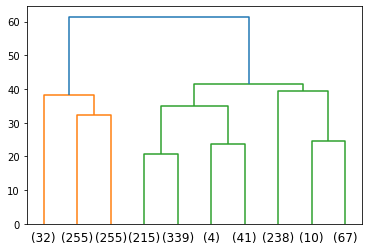

In [330]:
model = AgglomerativeClustering(affinity='euclidean', 
                                linkage='ward', 
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(my_score)
plot_dendrogram(model, truncate_mode='lastp', p=10)

In [332]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []
group9 = []
group10 = []

for i in range(1456):
    if labels[i] == 0:
        group1.append(C[i])
    elif labels[i] == 1:
        group2.append(C[i])
    elif labels[i] == 2:
        group3.append(C[i])
    elif labels[i] == 3:
        group4.append(C[i])
    elif labels[i] == 4:
        group5.append(C[i])
    elif labels[i] == 5:
        group6.append(C[i])
    elif labels[i] == 6:
        group7.append(C[i])
    elif labels[i] == 7:
        group8.append(C[i])
    elif labels[i] == 8:
        group9.append(C[i])
    else:
        group10.append(C[i])

In [333]:
df_group1 = df_score.loc[group1, :]
df_group1

,PC1,PC2,PC3,PC4
士別市（北海道）,-0.4500,0.6675,0.3343,-0.3380
北斗市（北海道）,-0.5769,-1.1968,0.3014,-0.0487
新篠津村（北海道）,-1.1377,0.2272,0.9360,0.0438
福島町（北海道）,-1.9940,0.0864,0.9601,-0.3836
知内町（北海道）,-1.9031,-0.0209,0.7915,-0.0379
...,...,...,...,...
大宜味村（沖縄県）,-1.6819,-0.4274,0.7123,-0.0030
東村（沖縄県）,-2.2787,-0.1400,0.3574,-0.2967
恩納村（沖縄県）,-1.3723,-2.2776,-0.7682,-0.2394
伊江村（沖縄県）,-1.4298,-1.0185,-0.4213,-0.1250


In [334]:
df_group2 = df_score.loc[group2, :]
df_group2

,PC1,PC2,PC3,PC4
千歳市（北海道）,0.7478,-0.5507,0.4829,-0.2398
恵庭市（北海道）,1.8837,-0.8823,0.4766,-0.1972
中標津町（北海道）,0.9430,-1.2304,-0.1066,-0.6990
黒石市（青森県）,0.8357,-1.0327,-0.3054,0.0070
鶴田町（青森県）,0.4526,-2.6156,-0.0041,0.2135
...,...,...,...,...
嘉手納町（沖縄県）,1.3886,-1.7966,0.4638,-0.6044
北谷町（沖縄県）,1.6370,-1.6352,1.1182,-0.6868
中城村（沖縄県）,1.9157,-1.6376,-0.8219,0.3925
与那原町（沖縄県）,3.0698,-3.2501,0.2746,0.1780


In [335]:
df_group3 = df_score.loc[group3, :]
df_group3

,PC1,PC2,PC3,PC4
室蘭市（北海道）,1.4400,0.3593,-0.1464,0.1957
岩見沢市（北海道）,0.8020,0.6175,0.5956,-0.1040
留萌市（北海道）,0.8844,1.1448,0.0943,-0.1275
美唄市（北海道）,0.6375,1.4648,-0.0201,-1.2820
芦別市（北海道）,0.3467,1.1398,-0.1208,-1.3213
...,...,...,...,...
薩摩川内市（鹿児島県）,0.2365,0.6457,-0.3212,0.4184
南九州市（鹿児島県）,0.0036,0.7124,-0.0788,-0.3305
姶良市（鹿児島県）,1.3629,-0.1873,-0.2469,0.1160
さつま町（鹿児島県）,0.9429,0.3071,-0.3699,0.0493


In [336]:
df_group4 = df_score.loc[group4, :]
df_group4

,PC1,PC2,PC3,PC4
網走市（北海道）,0.0445,0.3604,-0.4381,-0.8261
赤平市（北海道）,0.5574,1.3580,-1.2055,-1.1793
紋別市（北海道）,0.0253,1.0538,-1.0459,-1.5376
名寄市（北海道）,1.0726,1.3278,-0.5957,-0.7443
三笠市（北海道）,-0.3127,1.0459,-1.9160,-1.1203
...,...,...,...,...
南種子町（鹿児島県）,-1.2240,0.1358,-2.0712,-0.6617
瀬戸内町（鹿児島県）,-1.1894,1.8394,-1.1870,-0.5107
徳之島町（鹿児島県）,-0.9870,0.5210,-1.9755,-0.9479
知名町（鹿児島県）,-0.8846,1.4420,0.2930,-1.3625


In [337]:
df_group5 = df_score.loc[group5, :]
df_group5

,PC1,PC2,PC3,PC4
砂川市（北海道）,2.3621,2.0103,-1.1389,0.8948
川西町（山形県）,2.6294,1.3680,-2.2246,0.9508
下野市（栃木県）,5.9459,3.1791,-2.5100,3.9688
壬生町（栃木県）,5.8369,2.7793,-1.8685,4.0141
毛呂山町（埼玉県）,6.3133,3.8449,-2.0074,2.6026
鴨川市（千葉県）,5.2315,4.1864,-2.8580,1.9053
松田町（神奈川県）,2.8759,2.0602,-1.5824,1.4585
内灘町（石川県）,5.5965,3.2803,-3.1642,3.5306
永平寺町（福井県）,6.3126,5.1340,-4.1832,4.8582
中央市（山梨県）,5.3088,3.5413,-1.9730,3.3278


In [338]:
df_group6 = df_score.loc[group6, :]
df_group6

,PC1,PC2,PC3,PC4
夕張市（北海道）,0.4054,1.0869,1.5916,-0.2248
寿都町（北海道）,-1.1641,0.9952,1.4262,0.0312
真狩村（北海道）,-1.4986,0.7861,0.5429,0.9143
喜茂別町（北海道）,-1.2387,1.4670,2.4766,-0.7647
京極町（北海道）,-0.5025,0.8394,1.7257,-0.5680
...,...,...,...,...
南大東村（沖縄県）,-1.4290,0.7620,1.9400,-0.7153
伊平屋村（沖縄県）,-1.6543,1.1502,2.5082,-0.9472
多良間村（沖縄県）,-0.3523,2.3730,3.8238,-1.1793
竹富町（沖縄県）,-1.9095,1.4341,1.5253,0.9650


In [339]:
df_group7 = df_score.loc[group7, :]
df_group7

,PC1,PC2,PC3,PC4
黒松内町（北海道）,-1.8110,0.5844,0.0888,1.6677
音威子府村（北海道）,-2.4206,-0.3805,-1.5364,1.6570
七ヶ宿町（宮城県）,-3.1174,-0.3075,-0.9411,2.6909
上小阿仁村（秋田県）,-2.3663,-0.3524,-0.5401,1.2396
檜枝岐村（福島県）,-3.1702,-0.4104,-1.0801,2.3015
金山町（福島県）,-2.5369,0.2434,-0.3765,2.1054
昭和村（福島県）,-1.7344,0.4232,-0.3835,1.4162
大熊町（福島県）,-1.6806,-0.0371,-2.0345,1.7193
飯舘村（福島県）,-3.1776,-0.7091,-1.0950,1.3414
檜原村（東京都）,-2.6312,-0.4153,-0.3894,1.2096


In [340]:
df_group8 = df_score.loc[group8, :]
df_group8

,PC1,PC2,PC3,PC4
当別町（北海道）,7.6627,7.5429,8.8099,-2.6931
占冠村（北海道）,-0.9051,4.1153,6.2273,-1.3553
葛尾村（福島県）,0.0696,6.2838,8.8889,-1.2970
丹波山村（山梨県）,-0.8078,5.8638,7.0081,1.7355
塩尻市（長野県）,3.3991,2.2082,3.8059,-1.6561
売木村（長野県）,-0.1296,4.6897,6.1929,-0.7416
瑞穂市（岐阜県）,5.0393,1.3263,5.4257,-1.5537
知夫村（島根県）,-0.5127,3.8291,5.1689,-0.7466
渡名喜村（沖縄県）,-1.2755,5.5025,6.8876,0.6638
北大東村（沖縄県）,-0.2982,4.2079,5.6646,-0.7399


In [341]:
df_group9 = df_score.loc[group9, :]
df_group9

,PC1,PC2,PC3,PC4
青ヶ島村（東京都）,-3.8452,2.2867,-0.6043,8.3754
早川町（山梨県）,-4.8297,1.5614,0.3644,7.7818
三島村（鹿児島県）,-6.7158,3.0963,1.6457,12.2216
十島村（鹿児島県）,-6.5155,2.8587,1.5284,11.6789


In [342]:
df_group10 = df_score.loc[group10, :]
df_group10

,PC1,PC2,PC3,PC4
稚内市（北海道）,-0.3652,0.2512,-0.7146,-0.4633
根室市（北海道）,-0.8594,-0.2384,-0.2291,-0.6349
石狩市（北海道）,0.4431,-0.8747,-0.0436,-0.4099
七飯町（北海道）,0.2030,-1.1008,-0.1171,-0.0859
中富良野町（北海道）,-1.1774,0.2910,-0.9849,-1.9404
...,...,...,...,...
宮古島市（沖縄県）,-0.2858,0.2375,0.1846,-0.3770
今帰仁村（沖縄県）,-0.4549,-1.0771,-0.6047,-1.0784
本部町（沖縄県）,-1.0942,-0.5910,-0.8489,-0.7838
金武町（沖縄県）,0.0681,-1.2376,-0.9273,0.3453


In [343]:
pd.DataFrame([df_group1.mean(), df_group2.mean(), df_group3.mean(), df_group4.mean(), df_group5.mean(), df_group6.mean(),
            df_group7.mean(), df_group8.mean(), df_group9.mean(), df_group10.mean()], 
            index=['グループ1', 'グループ2', 'グループ3', 'グループ4', 'グループ5', 'グループ6', 'グループ7', 'グループ8', 'グループ9',
                'グループ10'])

,PC1,PC2,PC3,PC4
グループ1,-1.3073,-0.5912,0.2495,-0.0782
グループ2,1.3329,-1.4844,0.4103,0.1014
グループ3,1.1503,0.5050,0.0560,0.1268
グループ4,-0.3888,1.2024,-1.0267,-0.6956
グループ5,4.2669,2.2997,-1.7070,1.9868
グループ6,-0.9893,1.6575,1.8477,0.0999
グループ7,-2.8274,-0.1582,-0.7556,2.1720
グループ8,1.2242,4.5569,6.4080,-0.8384
グループ9,-5.4766,2.4508,0.7336,10.0144
グループ10,-0.1962,-0.3234,-0.2994,-0.2657
